Install the required libraries

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 88 kB 3.8 MB/s 
     |████████████████████████████████| 1.1 MB 35.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=149a3ed38ffd235fe85f26a29a3437be78b5a2068bf040a1c7a7a16fc69b48d5
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=f4ff11f656aacfdb5bd5937100c62ce5cdbe6fc7e3f850851ab93905b72dafdf
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [ ]:
!pip install umap-learn[plot]

     |████████████████████████████████| 15.8 MB 5.7 MB/s 
     |████████████████████████████████| 76 kB 6.4 MB/s 
     |████████████████████████████████| 837 kB 53.9 MB/s 
     |████████████████████████████████| 136 kB 53.2 MB/s 
     |████████████████████████████████| 830 kB 47.3 MB/s 
     |████████████████████████████████| 822 kB 54.1 MB/s 
     |████████████████████████████████| 802 kB 55.3 MB/s 
     |████████████████████████████████| 802 kB 52.1 MB/s 
     |████████████████████████████████| 793 kB 50.4 MB/s 
     |████████████████████████████████| 793 kB 47.7 MB/s 
     |████████████████████████████████| 791 kB 47.9 MB/s 
     |████████████████████████████████| 786 kB 8.5 MB/s 
     |████████████████████████████████| 779 kB 56.6 MB/s 
     |████████████████████████████████| 778 kB 50.2 MB/s 
     |████████████████████████████████| 776 kB 41.8 MB/s 
     |████████████████████████████████| 769 kB 49.8 MB/s 
     |████████████████████████████████| 766 kB 55.2 MB/s 
     |███████████

Import required libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_hub as hub

import umap
import umap.plot

import plotly.express as px

Read the preprocessed textual data from the CSV

In [ ]:
df = pd.read_csv('../data/preprocessed-data.csv')

In [ ]:
df.head()

,label,text
0,rec.sport.hockey,pens fans pretty confused lack kind posts rece...
1,comp.sys.ibm.pc.hardware,brother market high performance video card sup...
2,talk.politics.mideast,finally dream mediterranean area greater holoc...
3,comp.sys.ibm.pc.hardware,scsi card doing dma transfers disks scsi card ...
4,comp.sys.mac.hardware,[number] old drive cannot understanding driver...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   18270 non-null  object
 1   text    18270 non-null  object
dtypes: object(2)
memory usage: 285.6+ KB


Load the Google Sentence Encoder

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


Create sentence embedding for each text document in the dataset

In [ ]:
def embed(input):
  return model([input]).numpy()

In [ ]:
df['sentence_embedding'] = df['text'].apply(embed)

In [ ]:
df.head()

,label,text,sentence_embedding
0,rec.sport.hockey,pens fans pretty confused lack kind posts rece...,"((tf.Tensor(-0.039444268, shape=(), dtype=floa..."
1,comp.sys.ibm.pc.hardware,brother market high performance video card sup...,"((tf.Tensor(-0.039467383, shape=(), dtype=floa..."
2,talk.politics.mideast,finally dream mediterranean area greater holoc...,"((tf.Tensor(-0.057665743, shape=(), dtype=floa..."
3,comp.sys.ibm.pc.hardware,scsi card doing dma transfers disks scsi card ...,"((tf.Tensor(0.048537787, shape=(), dtype=float..."
4,comp.sys.mac.hardware,[number] old drive cannot understanding driver...,"((tf.Tensor(-0.052863356, shape=(), dtype=floa..."


Save a copy the the data with its corresponding sentence embedding vector

In [ ]:
df.to_csv("../data/sentence-embedding.csv", index=None)

In [ ]:
X = df.iloc[:,2].values
X[0].shape

TensorShape([1, 512])

In [ ]:
X_new = np.array([x.numpy() for x in X]).reshape((df.shape[0],512))

In [ ]:
X_new.shape

(18270, 512)

Create UMAP embedding from the sentence embedding vectors

In [ ]:
embedding = umap.UMAP(n_components=2).fit(X_new)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
embedding.embedding_.shape

(18270, 2)

Visualize the dataset using the UMAP embeddings 

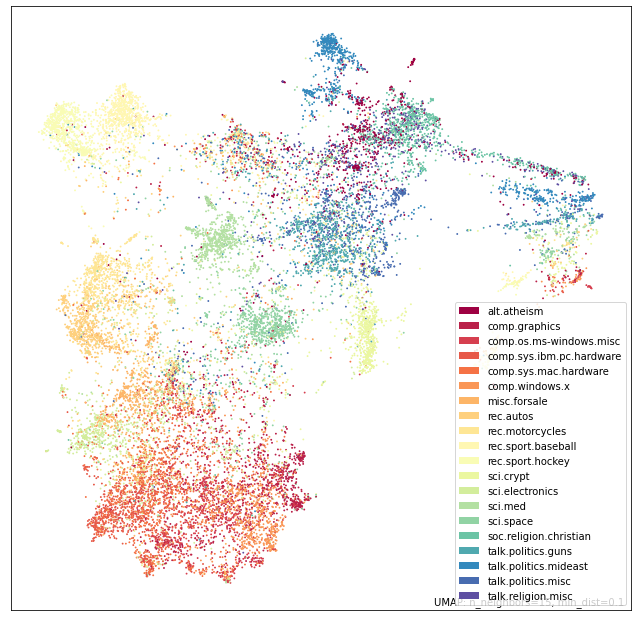

In [ ]:
f = umap.plot.points(embedding, labels=df['label'])

Now, let's create a 3D plot by creating a 3-dimentional embedding vector from UMAP

In [ ]:
embedding3d = umap.UMAP(n_components=3).fit(X_new)
embedding3d.embedding_.shape

(18270, 3)

In [ ]:
proj_3d = embedding3d.fit_transform(X_new)

Create a 3-D plot of the UMAP embedding created

In [ ]:
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.label, labels={'color': 'label'}
)
fig_3d.update_traces(marker_size=2)

fig_3d.show()

Visualize using TSNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE()
X_embedded = tsne.fit_transform(X_new)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [ ]:
palette = sns.color_palette("bright", 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



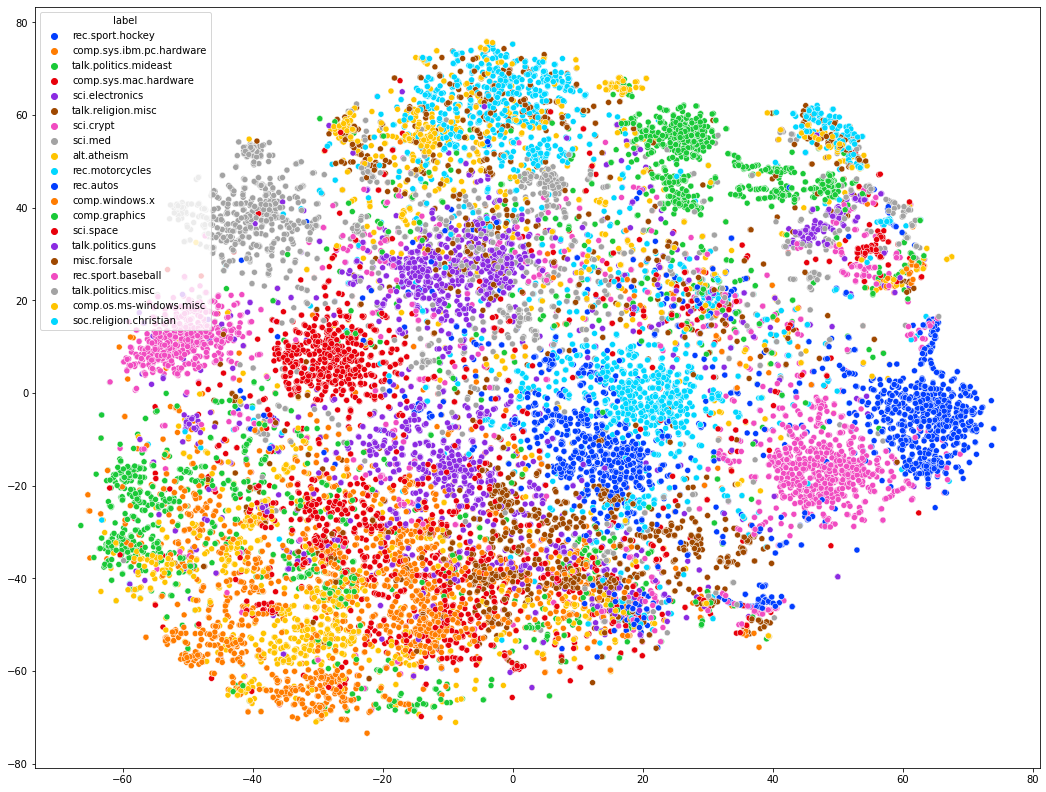

In [ ]:
plt.figure(figsize=(18,14))
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=df['label'], palette=palette)